https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
import math
from datetime import timedelta

In [2]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data=input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [5]:
data.test.cls = np.argmax(data.test.labels, axis=1)
data.test.cls

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [6]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [7]:
def plot_images(imgs, cls_true, cls_pred = None):
    assert len(imgs) == len(cls_true) == 9
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(imgs[i].reshape(img_shape), cmap='binary')
        
        if(cls_pred is None):
            xlabel="True: {0}".format(cls_true[i])
        else:
            xlabel="True: {0}, Pred: {1}".format(cls_true[i],cls_pred[i])
            
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

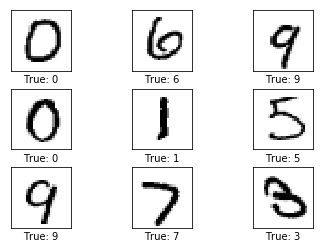

In [8]:
plot_images(data.test.images[10:19], data.test.cls[10:19])

In [9]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [10]:
session=tf.Session()

In [11]:
a = new_biases(10)
b = new_weights((2,3))
session.run(tf.global_variables_initializer())
print(session.run(a))
print(session.run(b))

[ 0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05]
[[ 0.01281146  0.07824033 -0.03935665]
 [ 0.00280792  0.00621894  0.00476742]]


In [12]:
session.close()
tf.reset_default_graph()

### create new convolutional layer

In [13]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, use_pooling=True):
    shape=[filter_size, filter_size, num_input_channels, num_filters]
    weights = new_weights(shape)
    biases = new_biases(num_filters)
    
    layer = tf.nn.conv2d(input=input, filter=weights, strides=[1,1,1,1], padding='SAME')
    layer +=biases
    if use_pooling:
        layer = tf.nn.max_pool(value=layer, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    layer = tf.nn.relu(layer)
    return layer, weights
        

In [14]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)

In [15]:
images = data.test.images[0:9]
labels = data.test.labels[0:9]
feed_dict = {x: images, y_true: labels}

In [16]:
layer_conv1, weights = new_conv_layer(input=x_image, num_input_channels=num_channels, filter_size=filter_size1,\
                                            num_filters=num_filters1, use_pooling=True)
session=tf.Session()
session.run(tf.global_variables_initializer())


In [17]:
layer=session.run(layer_conv1, feed_dict=feed_dict)
img=session.run(x_image, feed_dict=feed_dict)

In [18]:
img.shape

(9, 28, 28, 1)

In [19]:
layer.shape

(9, 14, 14, 16)

In [20]:
layer[0].shape

(14, 14, 16)

In [21]:
layer[0]

array([[[ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ],
        [ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ],
        [ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ],
        ..., 
        [ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ],
        [ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ],
        [ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ]],

       [[ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ],
        [ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ],
        [ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
          0.05      ,  0.05      ],
        ..., 
        [ 0.05      ,  0.05      ,  0.05      , ...,

In [22]:
type(layer)

numpy.ndarray

In [23]:
weights.shape

TensorShape([Dimension(5), Dimension(5), Dimension(1), Dimension(16)])

In [ ]:
a=np.arange(12)
b=a.reshape((2,3,2))
b

In [ ]:
b[0,:,:]

In [24]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [25]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

### Build network

In [26]:
layer_1, weights_1 = new_conv_layer(input=x_image, num_input_channels=num_channels, filter_size=filter_size1,
                                   num_filters=num_filters1, use_pooling=True)

layer_2, weights_2 = new_conv_layer(input=layer_1, num_input_channels=num_filters1, filter_size=filter_size2,
                                   num_filters=num_filters2, use_pooling=True)

In [27]:
layer_flat, num_features = flatten_layer(layer_2)
layer_flat

<tf.Tensor 'Reshape_1:0' shape=(?, 1764) dtype=float32>

In [28]:
num_features

1764

In [29]:
layer_2.get_shape()

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(36)])

In [32]:
layer_fc1 = new_fc_layer(input=layer_flat, num_inputs=num_features, num_outputs=fc_size, use_relu=True)
layer_fc2 = new_fc_layer(input=layer_fc1, num_inputs=fc_size, num_outputs=num_classes, use_relu=False)
layer_fc2

<tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>

In [33]:
y_pred=tf.nn.softmax(layer_fc2)
y_pred_cls=tf.argmax(y_pred, axis=1)

### Cost function, optimization and performance measures

In [34]:
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
cost=tf.reduce_mean(cross_entropy)

optimizer =tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

correct_pred=tf.equal(y_pred_cls, y_true_cls)
accuracy=tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### train model

In [46]:
train_batch_size=64
total_iterations=0
def optimize(num_iterations):
    global total_iterations
    start_time=time.time()
    
    for i in range(total_iterations, total_iterations+num_iterations):
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)
        feed_dict_train={x:x_batch,y_true:y_true_batch}
        session.run(optimizer, feed_dict=feed_dict_train)
        
        if i%100==0:
            acc=session.run(accuracy, feed_dict=feed_dict_train)
            print('Optimization iteration: {0: >6}, training accuracy: {1: >6.1%}'.format(i+1, acc))
        
    total_iterations +=num_iterations
    end_time=time.time()
    time_diff = end_time-start_time
    print("Time usage: " + str(timedelta(seconds=int(round(time_diff)))))
    

In [36]:
def plot_example_errors(cls_pred, correct):
    incorrect=correct==False
    images = data.test.images[incorrect]
    cls_pred=cls_pred[incorrect]
    cls_true=data.test.cls[incorrect]
    plot_images(images[0:9], cls_true[0:9], cls_pred[0:9])

In [50]:
def plot_confusion_matrix(cls_pred):
    cm=confusion_matrix(y_true=data.test.cls, y_pred=cls_pred)
    print(cm)
    plt.matshow(cm)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [37]:
# Split the test-set into smaller batches of this size.
test_batch_size = 64

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(data.test.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.test.images[i:j, :]

        # Get the associated labels.
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict1 = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict1)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = data.test.cls

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

### performance before optimization

In [38]:
session.run(tf.global_variables_initializer())

In [39]:
print_test_accuracy()

Accuracy on Test-Set: 9.6% (958 / 10000)


### performance after 1 optimization iteration

In [41]:
x_batch, y_true_batch = data.train.next_batch(32)
feed_dict_train={x:x_batch,y_true:y_true_batch}
y1=session.run(y_pred, feed_dict=feed_dict_train)

In [43]:
y1_cls=session.run(y_pred_cls, feed_dict=feed_dict_train)

In [44]:
y1_cls

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64)

In [47]:
optimize(1)
print_test_accuracy()

Optimization iteration:      1, training accuracy:  12.5%
Time usage: 0:00:00
Accuracy on Test-Set: 9.6% (958 / 10000)


### performance after 100 optimization iteration

In [48]:
optimize(99)
print_test_accuracy()

Time usage: 0:00:05
Accuracy on Test-Set: 64.3% (6427 / 10000)


### performance after 1000 optimization iteration

In [49]:
optimize(900)


Optimization iteration:    101, training accuracy:  70.3%
Optimization iteration:    201, training accuracy:  81.2%
Optimization iteration:    301, training accuracy:  85.9%
Optimization iteration:    401, training accuracy:  84.4%
Optimization iteration:    501, training accuracy:  95.3%
Optimization iteration:    601, training accuracy:  85.9%
Optimization iteration:    701, training accuracy:  84.4%
Optimization iteration:    801, training accuracy:  96.9%
Optimization iteration:    901, training accuracy:  93.8%
Time usage: 0:00:45


NameError: name 'rint_test_accuracy' is not defined

Accuracy on Test-Set: 93.3% (9334 / 10000)
Example errors:
Confusion Matrix:
[[ 963    0    2    2    0    2    5    1    5    0]
 [   0 1114    3    2    0    0    4    0   12    0]
 [  13    3  939   22   16    0    3   17   19    0]
 [   2    1    7  963    0    3    0   11   17    6]
 [   1    3    5    0  930    0    9    1    3   30]
 [  13    4    4   49    8  776    8    1   23    6]
 [  16    7    4    2   11   14  902    0    2    0]
 [   2   12   22    7    5    0    0  932    4   44]
 [   8    4    2   23   13    7    5    9  884   19]
 [  13    7    5   13   19    1    0   13    7  931]]


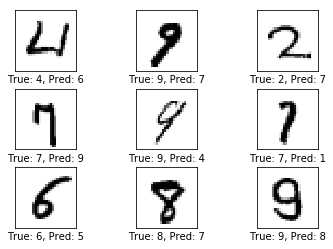

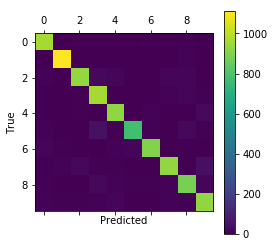

In [51]:
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)

### visualize weights and layers

In [52]:
def plot_cov_weights(weights, input_channel=0):
    w=session.run(weights)
    w_min=np.min(w)
    w_max=np.max(w)
    
    num_filters=w.shape[3]
    num_grids=math.ceil(math.sqrt(num_filters))
    
    fig, axes=plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = w[:,:,input_channel, i]
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])

In [63]:
def plot_cov_layer(layer, image):
    feed_dict={x:[image]}
    values=session.run(layer, feed_dict=feed_dict)

    num_filters=values.shape[3]
    num_grids=math.ceil(math.sqrt(num_filters))
    
    fig, axes=plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = values[0,:,:,i]
            ax.imshow(img, interpolation='nearest',cmap='binary')
            ax.set_xticks([])
            ax.set_yticks([])

In [54]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape), interpolation='nearest', cmap='binary')

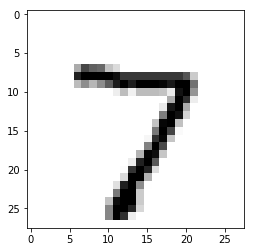

In [55]:
img1=data.test.images[0]
plot_image(img1)

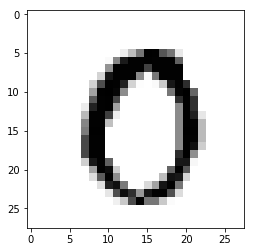

In [56]:
img2=data.test.images[13]
plot_image(img2)

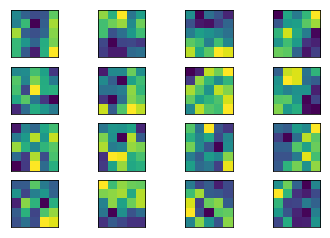

In [57]:
plot_cov_weights(weights_1)

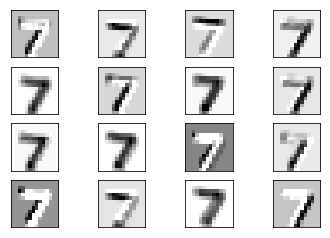

In [64]:
plot_cov_layer(layer_1, img1)

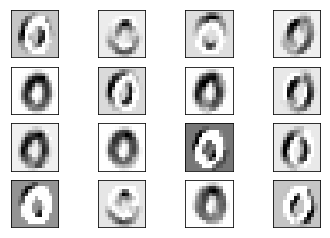

In [65]:
plot_cov_layer(layer_1, img2)

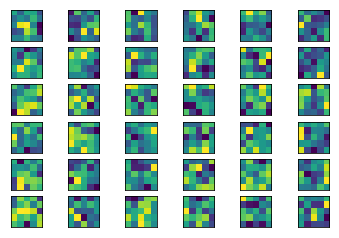

In [59]:
plot_cov_weights(weights_2, input_channel=0)

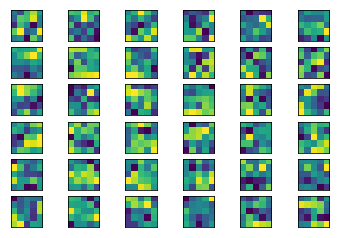

In [60]:
plot_cov_weights(weights_2, input_channel=1)

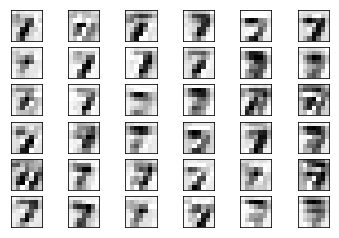

In [66]:
plot_cov_layer(layer_2, img1)

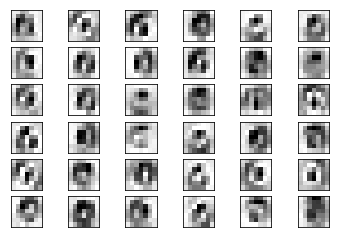

In [67]:
plot_cov_layer(layer_2, img2)

In [ ]:
session.close()